In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading in our dataset
df = pd.read_csv("youtube.csv")
df.head()

,year,brand,superbowl_ads_dot_com_url,youtube_url,funny,show_product_quickly,patriotic,celebrity,danger,animals,...,like_count,dislike_count,favorite_count,comment_count,published_at,title,description,thumbnail,channel_title,category_id
0,2018,Toyota,https://superbowl-ads.com/good-odds-toyota/,https://www.youtube.com/watch?v=zeBZvwYQ-hA,False,False,False,False,False,False,...,1233.0,38.0,0.0,NaN,2018-02-03T11:29:14Z,Toyota Super Bowl Commercial 2018 Good Odds,Toyota Super Bowl Commercial 2018 Good Odds. Y...,https://i.ytimg.com/vi/zeBZvwYQ-hA/sddefault.jpg,Funny Commercials,1.0
1,2020,Bud Light,https://superbowl-ads.com/2020-bud-light-seltz...,https://www.youtube.com/watch?v=nbbp0VW7z8w,True,True,False,True,True,False,...,485.0,14.0,0.0,14.0,2020-01-31T21:04:13Z,Bud Light: Post Malone #PostyStore Inside Post...,"Bud Light, Post Malone ""#PostyStore Inside Pos...",https://i.ytimg.com/vi/nbbp0VW7z8w/sddefault.jpg,VCU Brandcenter,27.0
2,2006,Bud Light,https://superbowl-ads.com/2006-bud-light-bear-...,https://www.youtube.com/watch?v=yk0MQD5YgV8,True,False,False,False,True,True,...,129.0,15.0,0.0,9.0,2006-02-06T10:02:36Z,"Super Bowl 2006: Bud Light ""Save Yourself""",Bud Light Super Bowl commercial where two guys...,NaN,John Keehler,17.0
3,2018,Hynudai,https://superbowl-ads.com/hope-detector-nfl-su...,https://www.youtube.com/watch?v=lNPccrGk77A,False,True,False,False,False,False,...,2.0,0.0,0.0,0.0,2018-03-09T15:40:18Z,Hyundai / Hope Detector (2018),"TV or Web Commercial, shot on location in MN ...",NaN,IATSE 490,22.0
4,2003,Bud Light,https://superbowl-ads.com/2003-bud-light-hermi...,https://www.youtube.com/watch?v=ovQYgnXHooY,True,True,False,False,True,True,...,20.0,3.0,0.0,2.0,2006-07-18T04:53:42Z,bud light pick up,see how a dude tries to pick up babes at a bea...,NaN,jassymei,24.0


In [2]:
# looking at all the variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       247 non-null    int64  
 1   brand                      247 non-null    object 
 2   superbowl_ads_dot_com_url  247 non-null    object 
 3   youtube_url                236 non-null    object 
 4   funny                      247 non-null    bool   
 5   show_product_quickly       247 non-null    bool   
 6   patriotic                  247 non-null    bool   
 7   celebrity                  247 non-null    bool   
 8   danger                     247 non-null    bool   
 9   animals                    247 non-null    bool   
 10  use_sex                    247 non-null    bool   
 11  id                         236 non-null    object 
 12  kind                       231 non-null    object 
 13  etag                       231 non-null    object 

Question: Which categories have the most likes and dislikes and average like and dislikes per ad?

In [4]:
category_cols = [
    "funny",
    "patriotic",
    "celebrity",
    "animals",
    "danger",
    "use_sex",
    "show_product_quickly"
]

data1 = []

for category in category_cols:
    likes_sum = df.loc[df[category] == True, "like_count"].sum()
    dislikes_sum = df.loc[df[category] == True, "dislike_count"].sum()
    
    data1.append({
        "category": category,
        "likes": likes_sum,
        "dislikes": dislikes_sum
    })

category_engagement = pd.DataFrame(data1)

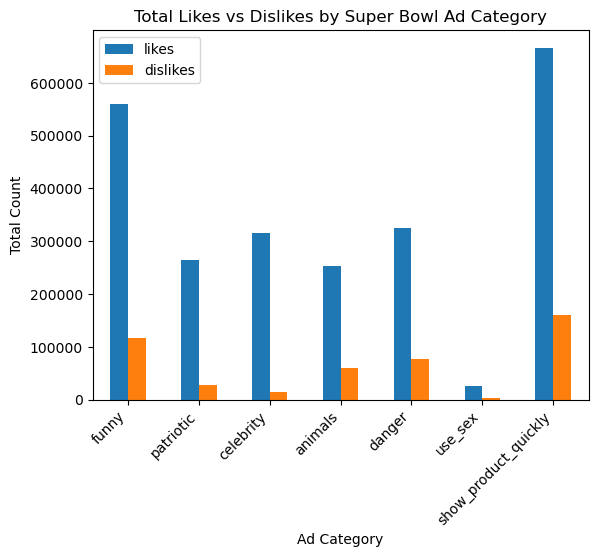

In [5]:
category_engagement.plot(kind='bar', stacked=False)

x = np.arange(len(category_engagement["category"]))
plt.xticks(x, category_engagement["category"], rotation=45, ha="right")
plt.xlabel("Ad Category")
plt.ylabel("Total Count")
plt.title("Total Likes vs Dislikes by Super Bowl Ad Category")
plt.legend()

plt.show()

We can see that ads that are funny and show the advertisement products quickly have the most amount of likes out of all the categories. The superbowl ads also tends to not recieve as many likes for the use sex category.

In [16]:
data2 = []

for category in category_cols:
    avg_likes = df.loc[df[category] == True, "like_count"].mean()
    avg_dislikes = df.loc[df[category] == True, "dislike_count"].mean()
    ratio = avg_likes / avg_dislikes if avg_dislikes > 0 else np.nan
    
    data2.append({
        "category": category,
        "likes": avg_likes,
        "dislikes": avg_dislikes,
        "like_dislike_ratio": ratio 
    })

category_engagement_2 = pd.DataFrame(data2)

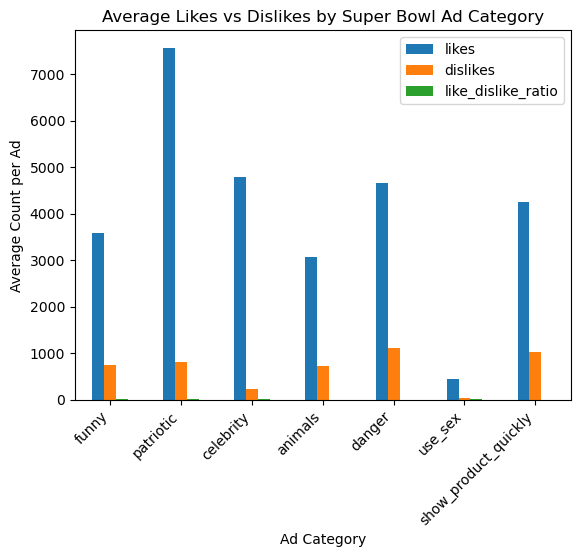

In [17]:
category_engagement_2.plot(kind='bar', stacked=False)

x = np.arange(len(category_engagement_2["category"]))
plt.xticks(x, category_engagement_2["category"], rotation=45, ha="right")
plt.xlabel("Ad Category")
plt.ylabel("Average Count per Ad")
plt.title("Average Likes vs Dislikes by Super Bowl Ad Category")
plt.legend()

plt.show()

Patriotic ads had the highest average amount of likes per AD. 

In [19]:
category_engagement_2.sort_values("like_dislike_ratio", ascending=False)

,category,likes,dislikes,like_dislike_ratio
2,celebrity,4796.318182,230.318182,20.824748
5,use_sex,442.745763,40.203390,11.012648
1,patriotic,7566.257143,806.628571,9.380101
0,funny,3587.000000,746.551282,4.804760
3,animals,3060.506024,718.506024,4.259541
4,danger,4651.628571,1104.342857,4.212124
6,show_product_quickly,4245.751592,1015.828025,4.179597


Celebrity based ads have a high like to dislike ratio of approximately 20.8 which is relatively much higher than the other categories. Which shows that celebrity ads receive far more positive engagement than negative engagement. Viewers are generally very favorable toward celebrity-based Super Bowl ads. 